In [1]:
import pandas as pd

df = pd.read_csv("..\\data\\column_2C_weka.csv")

df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [2]:
df.shape    # number of rows & columns

(310, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
df.columns      # feature names

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

#### Feature Columns

| Column Name                  | Description                                                                                                                                                        |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **pelvic_incidence**         | Anatomical angle that describes the orientation of the pelvis. It is a fixed parameter for each individual and is strongly related to spinal balance.              |
| **pelvic_tilt**              | Measures the rotation of the pelvis relative to the femur heads. It reflects how much the pelvis is tilted forward or backward and varies with posture.            |
| **lumbar_lordosis_angle**    | Angle that measures the curvature of the lower (lumbar) spine. Abnormal curvature is often associated with spinal disorders.                                       |
| **sacral_slope**             | Angle between the sacrum and the horizontal plane. It influences spinal alignment and satisfies the relationship: `pelvic_incidence = pelvic_tilt + sacral_slope`. |
| **pelvic_radius**            | Distance between the center of the pelvis and the femoral heads. It represents pelvic geometry and stability.                                                      |
| **degree_spondylolisthesis** | Measures the forward displacement of a vertebra relative to the one below it. High values are strong indicators of spinal abnormalities.                           |


#### Target Column

| Column Name | Description                                                                                                              |
| ----------- | ------------------------------------------------------------------------------------------------------------------------ |
| **class**   | Target label for classification. Values are:<br>• `Normal` – healthy spine<br>• `Abnormal` – presence of spinal disorder |


In [5]:
df.isna().sum() # missing values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

class
Abnormal    210
Normal      100
Name: count, dtype: int64


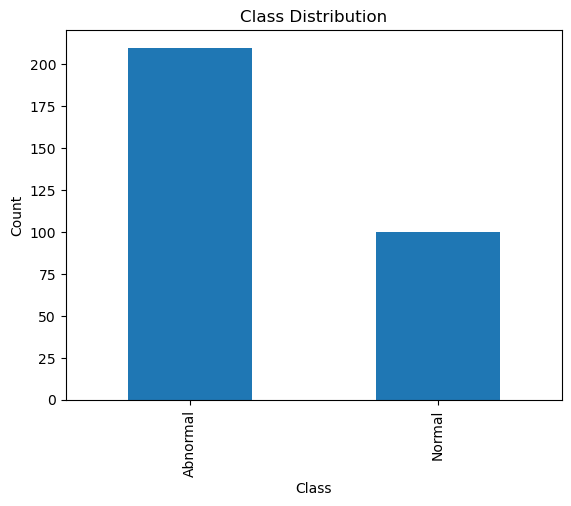

In [6]:
import matplotlib.pyplot as plt
print(df["class"].value_counts()) 

df["class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


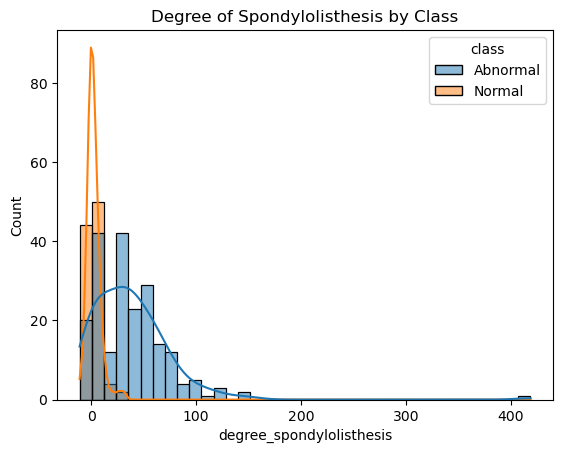

In [7]:
import seaborn as sns

sns.histplot(data=df, x="degree_spondylolisthesis", hue="class", kde=True)
plt.title("Degree of Spondylolisthesis by Class")
plt.show()


The histogram shows a clear distinction: 'Normal' cases predominantly have very low 'degree_spondylolisthesis' values, peaking near zero. 'Abnormal' cases, however, show a wider distribution with higher values, suggesting a stronger association between elevated 'degree_spondylolisthesis' and the 'Abnormal' class.

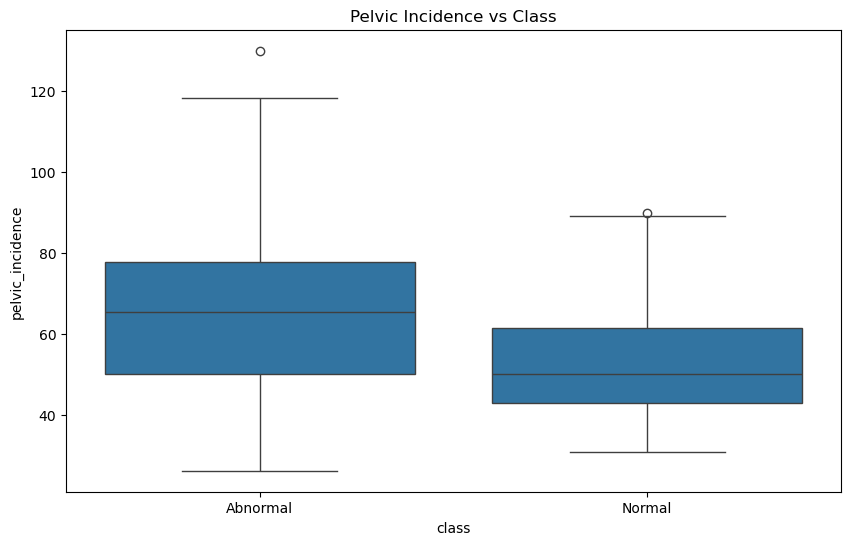

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="pelvic_incidence")
plt.title("Pelvic Incidence vs Class")
plt.show()


This box plot shows 'Abnormal' cases have higher median 'pelvic_incidence' and a wider distribution compared to 'Normal' cases. Both groups exhibit outliers. This suggests 'pelvic_incidence' is a strong distinguishing feature between the t
wo classes.

### Correlation Heatmap

Which features are related to each other?

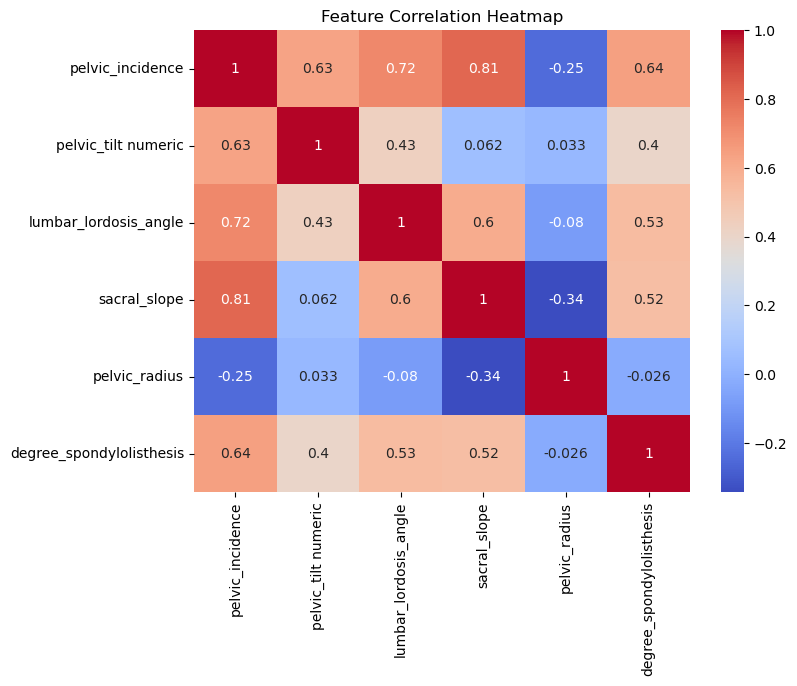

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.drop(columns=["class"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


The heatmap reveals strong positive correlations among 'pelvic_incidence', 'lumbar_lordosis_angle', 'sacral_slope', and 'degree_spondylolisthesis'. Notably, 'pelvic_incidence' and 'sacral_slope' are highly correlated (0.81). 'pelvic_radius' shows a weak negative correlation with most other features, especially 'sacral_slope' (-0.34). This suggests significant multicollinearity among several features, particularly those related to pelvic and spinal alignment.

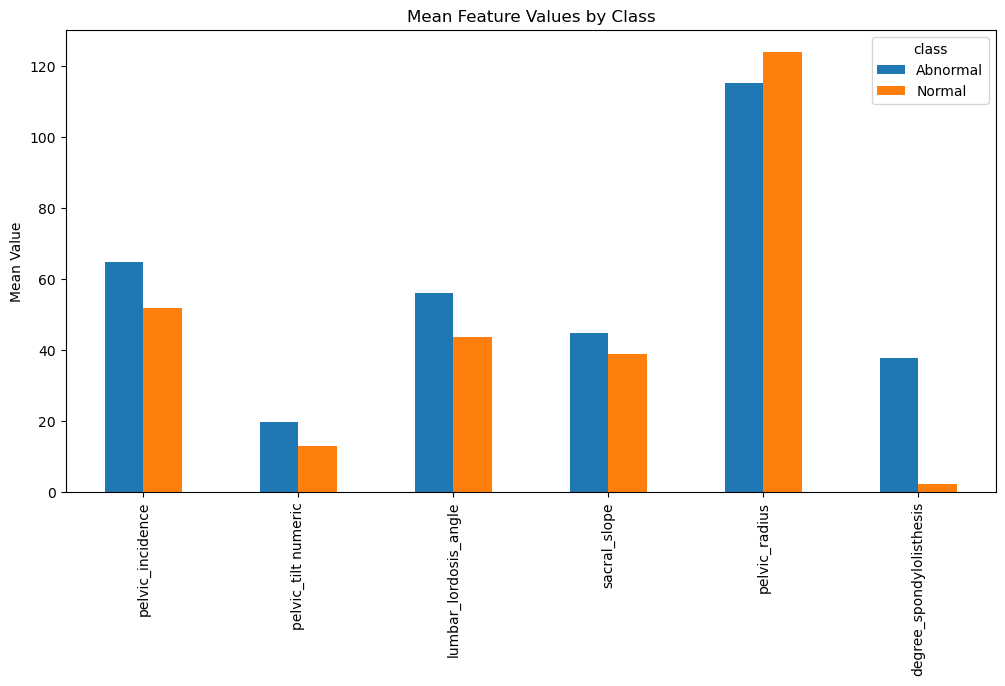

In [10]:
df.groupby("class").mean().T.plot(kind="bar", figsize=(12,6))
plt.title("Mean Feature Values by Class")
plt.ylabel("Mean Value")
plt.show()


The bar chart highlights significant differences in mean feature values between 'Abnormal' and 'Normal' classes. 'Abnormal' cases consistently show higher mean values for 'pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', and drastically higher 'degree_spondylolisthesis'. Conversely, 'Normal' cases have a higher mean 'pelvic_radius'. This indicates strong predictive power for several features, particularly 'degree_spondylolisthesis'.

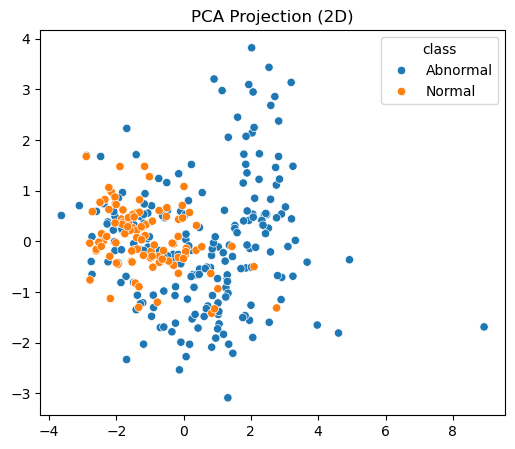

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=["class"])
y = df["class"]

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title("PCA Projection (2D)")
plt.show()


The PCA projection shows a degree of separation between the 'Abnormal' (blue) and 'Normal' (orange) classes, although there's considerable overlap. The 'Abnormal' class tends to spread more across the positive values of the horizontal axis and higher values on the vertical axis, suggesting that these two principal components capture some of the underlying differences between the groups. However, the intermingling of points, particularly in the central region, indicates that a perfect linear separation based solely on these two principal components is not achieved. This means while PCA helps visualize some class distinction, these two components alone might not be sufficient for highly accurate classification.

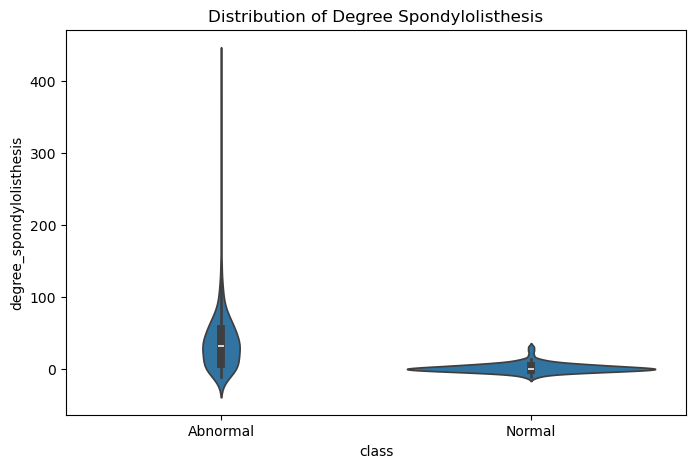

In [12]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="class", y="degree_spondylolisthesis")
plt.title("Distribution of Degree Spondylolisthesis")
plt.show()


This violin plot vividly illustrates the distribution of 'degree_spondylolisthesis' for 'Abnormal' versus 'Normal' classes. The 'Normal' class exhibits a very narrow, concentrated distribution near zero for 'degree_spondylolisthesis', indicating that most normal individuals have little to no spondylolisthesis. In stark contrast, the 'Abnormal' class shows a much wider violin shape, particularly elongated on the upper end. This signifies a broad range of 'degree_spondylolisthesis' values, with a substantial number of abnormal individuals having significantly higher degrees of spondylolisthesis. The plot clearly underscores 'degree_spondylolisthesis' as a highly discriminatory feature between the two classes.